In [1]:
%load_ext autoreload
%autoreload 2

import skimage
import skimage.io
from skimage.transform import rescale
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
from imtools import *
from tsp import *

## Step 1: Create The Stipple

In [2]:
thresh = 0.1
p = 1
canny_sigma = 3
density_fac= 1
edge_weight = 10
target_points = 2000

np.random.seed(0)
I = skimage.io.imread("../data/images/usher.jpg")

weights = get_weights(I, thresh, canny_sigma=canny_sigma)
X = voronoi_stipple(I, thresh, target_points=target_points, p=p, canny_sigma=canny_sigma, edge_weight=edge_weight, n_iters=10, do_plot=False)

0
535
1106
1614


In [3]:
Z = get_tsp_tour(X)
from skimage import feature
edges = feature.canny(0.2125*I[:, :, 0] + 0.7154*I[:, :, 1] + 0.0721*I[:, :, 2], sigma=canny_sigma)

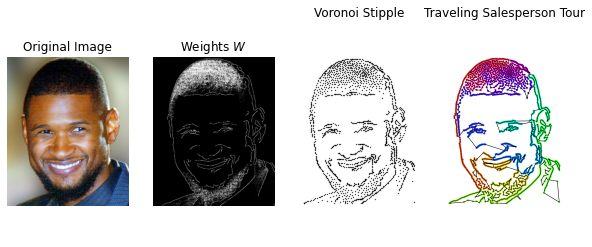

In [4]:
from skimage.transform import rescale
fac = 0.5
plt.figure(figsize=(fac*20, fac*8))
#plt.subplot2grid((2, 4), (0, 0), colspan=1, rowspan=1)
plt.subplot(141)
plt.imshow(I)
plt.axis("off")
plt.title("Original Image")

#plt.subplot2grid((2, 4), (1, 0), colspan=1, rowspan=1)
plt.subplot(142)
plt.imshow(rescale(weights, 0.5, anti_aliasing=True), cmap='gray')
plt.axis("off")
plt.title("Weights $W$")

#plt.subplot2grid((2, 4), (1, 1), colspan=1, rowspan=1)
plt.subplot(143)
plt.scatter(X[:, 0], X[:, 1], 0.1, c='k')
plt.title("Voronoi Stipple")
plt.axis("equal")
plt.axis("off")

#plt.subplot2grid((2, 4), (0, 1), colspan=1, rowspan=1)
#plt.imshow(edges)
#plt.axis("equal")
#plt.axis("off")
#plt.title("Canny Edges")


#plt.subplot2grid((2, 4), (0, 2), colspan=2, rowspan=2)
plt.subplot(144)
plt.scatter(Z[:, 0], Z[:, 1], s=1, c=sinebow(np.linspace(0, 1, Z.shape[0])), cmap='RdBu', zorder=1)
plt.plot(Z[:, 0], Z[:, 1], 'k', linewidth=0.5)
plt.gca().set_facecolor((0.8, 0.8, 0.8))
plt.axis("equal")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.title("Traveling Salesperson Tour")
plt.axis("off")
plt.savefig("TSPTour.svg", bbox_inches='tight')